In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import matthews_corrcoef

warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

In [49]:
data = pd.read_csv('train.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [50]:
#data['Churn'].value_counts().plot(kind='bar')

In [51]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
2376,0,62,24.40
3274,0,17,24.10
3302,1,6,98.25
1562,0,14,80.90
1419,0,47,20.25


In [52]:
data.TotalCharges.value_counts().head(10)
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [53]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
2854,0,71,71.10,5224.95
1458,0,49,103.70,5036.30
1032,0,5,40.00,223.45
50,0,17,19.65,351.55
1629,0,21,111.20,2317.10


In [151]:
def dataPrepare(data):
    data = data.drop('Phone', axis=1)
    data = data.replace({'Yes': 1, 'No': 0, 'No internet service': -1,'No phone service':-1\
                      ,'Month-to-month':-1,'Two year':1,'One year':0\
                    })
    data = data.replace({'Gender': {'Female': 0, 'Male': 1}})
    data['TotalCharges'] =data['TotalCharges'].replace(regex=r'^(\D+)$', value=0).astype(float)
    #data['Internet'] = data['Internet'].replace({'Fiber optic':1,'DSL':0,0:-1})
   # data = pd.concat([data.drop(['PaymentMethod'], axis=1), 
                            # pd.get_dummies(data['PaymentMethod'])
                          #  ], axis = 1)
    return data

In [44]:
def dataPrepare(data):
    data_to_train = data.replace({'Phone': {'Yes': 1, 'No': 0},
                     'Backup': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                     'Insurance': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                     'Movies': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                     'TV': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                    'EBilling':{'Yes': 1, 'No': 0}, 
                    'Contract' :{'Month-to-month':-1,'Two year':1,'One year':0}
                    }) 
    return data_to_train
training_data = dataPrepare(data)  

In [152]:
training_data = dataPrepare(data)
data = pd.read_csv('train.csv', index_col=0)
data_to_train = data.replace({#'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Backup': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                     'Insurance': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                     'Movies': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                     'TV': {'Yes': 1 , 'No': 0, 'No internet service': 0},
                    'EBilling':{'Yes': 1, 'No': 0}, 
                    'Contract' :{'Month-to-month':1,'One year': 2, 'Two year': 3}
                    }) 
                    


In [ ]:
data_to_train = data.replace({'Yes': 1, 'No': 0, 'No internet service': -1,'No phone service':-1\
                      ,'Month-to-month':-1,'Two year':1,'One year':0\
                    })
data_to_train = data_to_train.replace({'Gender': {'Female': 1, 'Male': 0}})
data_to_train['TotalCharges'] = data_to_train['TotalCharges'].replace(regex=r'^(\D+)$',value=0).astype(float)
data_to_train = pd.concat([data_to_train.drop(['PaymentMethod'], axis=1), 
                             pd.get_dummies(data_to_train['PaymentMethod'])
                            ], axis = 1)

In [54]:
numeric_data = training_data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,Phone,Backup,Insurance,TV,Movies,Contract,EBilling,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,
3283,0,47,0,0,1,0,0,0,0,40.30,1794.80
2299,1,52,1,0,1,1,1,-1,1,104.20,5568.35
167,0,61,1,0,0,0,0,1,0,19.75,1311.60
3445,1,67,1,0,1,1,1,0,1,107.05,7142.50
1452,0,25,1,0,0,0,0,-1,1,19.20,532.10


<AxesSubplot:xlabel='TotalCharges'>

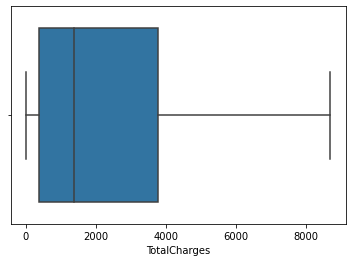

In [55]:
#data['MonthlyCharges'].describe()
data['TotalCharges'] =data['TotalCharges'].replace(regex=r'^(\D+)$', value=0).astype(float)
data['TotalCharges'].astype(float).describe()
sns.boxplot(x = data['TotalCharges'])

In [56]:
from sklearn import preprocessing
import numpy as np

<AxesSubplot:>

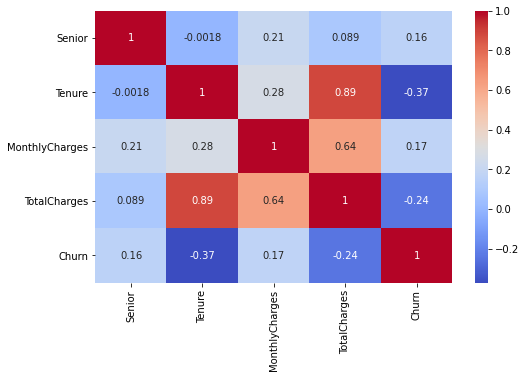

In [57]:
#to_plot = numeric_data.drop(['Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check'])
plt.figure(figsize=(8,5))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [58]:
from sklearn.model_selection import train_test_split
#this all data is for training 2395
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, 
                                                    data.Churn,
                                                    test_size = 0.333,
                                                    random_state = 1)
data2 = pd.read_csv('test.csv', index_col=0)
#X_train.info()

In [59]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy_predictions = dummy.predict(X_train)


In [60]:
from sklearn.metrics import classification_report, plot_confusion_matrix

#print (classification_report(Y_train, dummy_predictions))

#plot_confusion_matrix(estimator=dummy, X= X_train, y_true=Y_train)

In [61]:
#print (classification_report(Y_test, dummy.predict(X_test)))

#plot_confusion_matrix(estimator=dummy, X= X_test, y_true=Y_test)

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1740
        True       1.00      0.99      0.99       655

    accuracy                           1.00      2395
   macro avg       1.00      0.99      1.00      2395
weighted avg       1.00      1.00      1.00      2395



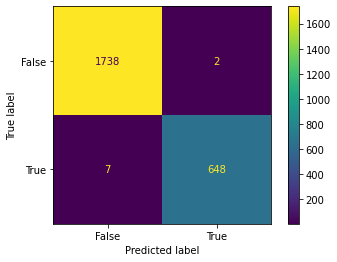

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict (X_train)

print('Train evaluation')
print(classification_report(Y_train, dt_train_predictions))
plot_confusion_matrix(estimator = dt, X= X_train, y_true=Y_train)


In [63]:
from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(25, 20), dpi=200)

#plot_tree(dt, filled=True, ax=fig.gca(), fontsize='small');

Tree depth: 21


<Figure size 5000x4000 with 0 Axes>

In [91]:
dt_test_predictions = dt.predict(X_test)

print('Test evaluation')
print(classification_report(Y_test, dt_test_predictions))

#plot_confusion_matrix(estimator = dt, X= X_test, y_true=Y_test)

Test evaluation
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       871
        True       0.84      0.84      0.84       325

    accuracy                           0.91      1196
   macro avg       0.89      0.89      0.89      1196
weighted avg       0.91      0.91      0.91      1196



In [100]:
smart_dt = DecisionTreeClassifier(min_samples_leaf = 13, max_depth = 12).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Train evaluation')
sdt_train_predictions = smart_dt.predict (X_train)
#print(classification_report(Y_train, sdt_train_predictions))
print(matthews_corrcoef(Y_train,sdt_train_predictions))

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
print(classification_report(Y_test, sdt_test_predictions))
matthews_corrcoef(Y_test,sdt_test_predictions)

Tree depth: 12
Train evaluation
0.5682138563629556
Test evaluation
              precision    recall  f1-score   support

       False       0.82      0.89      0.85       871
        True       0.61      0.47      0.53       325

    accuracy                           0.77      1196
   macro avg       0.71      0.68      0.69      1196
weighted avg       0.76      0.77      0.76      1196



0.38954943491431027

In [82]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [40,17,10,28],
               'max_depth': [15,17,19,23],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [83]:
grid.best_score_

0.6941983804056244

In [84]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 40}

In [85]:
print('Train evaluation')
gbm_train_predictions = grid_best_model.predict (X_train)
print(classification_report(Y_train, gbm_train_predictions))
print(matthews_corrcoef(Y_train, gbm_train_predictions))
print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
print(classification_report(Y_test, gbm_test_predictions))
matthews_corrcoef(Y_test,gbm_test_predictions)

Train evaluation
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1740
        True       0.69      0.50      0.58       655

    accuracy                           0.80      2395
   macro avg       0.76      0.71      0.73      2395
weighted avg       0.79      0.80      0.79      2395

0.4666919960197306
Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       899
        True       0.62      0.49      0.55       297

    accuracy                           0.80      1196
   macro avg       0.73      0.70      0.71      1196
weighted avg       0.79      0.80      0.79      1196



0.4277029052426911

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 5, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions))


matthews_corrcoef(Y_train, cv_lr_predictions)

Train evaluation
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1740
        True       0.64      0.52      0.58       655

    accuracy                           0.79      2395
   macro avg       0.74      0.71      0.72      2395
weighted avg       0.78      0.79      0.78      2395



0.4409912503600239

In [87]:
lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict(X_test)
#print(classification_report(Y_train, lr_test_predictions))
matthews_corrcoef(Y_test, lr_test_predictions)

Test evaluation


0.46835483963260915

In [88]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)

,Gender,Married,Dependents,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,Churn
Index,,,,,,,,,,,,,,,,
585,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),False
1458,Male,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),True
3554,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,False
1615,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),False
2666,Male,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,True


In [89]:
data = pd.read_csv('train.csv', index_col=0)
data2 = pd.read_csv('test.csv', index_col=0) 
data.head(5)

data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Dependents':{'Yes': 1, 'No': 0} #лучше вообще нахуй убрать, только мешает
                    })


In [90]:
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.sample(5))

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, 
                                                    data.Churn,
                                                    #0.66669
                                                    test_size = 0.333,
                                                    random_state = 10)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions_data = cross_val_predict(lr, X_train, Y_train, cv = 5, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions_data ))
from sklearn.metrics import matthews_corrcoef

print(matthews_corrcoef(Y_train, cv_lr_predictions_data ))


lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict(X_test)
print(classification_report(Y_test, lr_test_predictions))
matthews_corrcoef(Y_test, lr_test_predictions)

       Gender  Senior  Married  Dependents  Tenure  Phone  MonthlyCharges
Index                                                                    
2884        0       0        1           0      72      1           84.45
3286        1       0        0           0       4      1           55.50
3086        0       0        1           0      36      1           93.60
2944        1       0        0           0       9      1           85.30
1089        1       0        1           1      51      1           19.95
Train evaluation
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1768
        True       0.65      0.52      0.58       627

    accuracy                           0.80      2395
   macro avg       0.75      0.71      0.73      2395
weighted avg       0.79      0.80      0.79      2395

0.4572688332405495
Test evaluation
              precision    recall  f1-score   support

       False       0.83      0.87      0.85     

0.4168497873533403

In [30]:
import csv
with open('answer.csv', 'w') as fp:
    fp.write('Index,Churn\n')
    for row in range(len(lr_test_predictions)):
        fp.write(str(row) + ',' + str(lr_test_predictions[row]) + '\n')


In [33]:
def print_csv(data):
    with open('lastdaytry.csv', 'w') as fp:
        fp.write('Index,Churn\n')
        for row in range(len(data)):
            fp.write(str(row) + ',' + str(data[row]) + '\n')


In [104]:
print_csv(predictions)

In [103]:
test = pd.read_csv('test.csv', index_col=0)
train = pd.read_csv('train.csv', index_col=0)

train = train.pipe(dataPrepare)

numeric_data = train.select_dtypes(include=np.number)

X_train = numeric_data
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)

test = test.pipe(dataPrepare)[numeric_data.columns]

tree_params = {'min_samples_leaf': [20,28,1,13],
               'max_depth': [13,17,19,23],
               'criterion': ['gini', 'entropy']              
              }

model = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

model = DecisionTreeClassifier(min_samples_leaf = 13, max_depth = 12)

model.fit(train[numeric_data.columns], train.Churn)

predictions = model.predict(test)
predictions

array([False, False, False, ...,  True, False, False])

In [184]:
model1 = LogisticRegression()
model1.fit(train[numeric_data.columns], train.Churn)

lr_test_predictions = model1.predict(X_scaled_test)